In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_motion_data.csv')
df_test = pd.read_csv('test_motion_data.csv')

In [3]:
df['Class'] = df['Class'].replace({'AGGRESSIVE': 0, 'SLOW': 1, 'NORMAL': 1})
df_test['Class'] = df_test['Class'].replace({'AGGRESSIVE': 0, 'SLOW': 1, 'NORMAL': 1})

In [4]:
df = pd.concat([df,df_test],ignore_index=True)

In [5]:
df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,1,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,1,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,1,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,1,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,1,3581631
...,...,...,...,...,...,...,...,...
6723,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,1,820706
6724,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,1,820707
6725,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,1,820707
6726,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,1,820708


In [6]:
df.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
count,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6.728000e+03
mean,0.070613,-0.100175,0.025112,0.002326,-0.000024,0.009564,0.713585,2.316251e+06
std,0.978118,0.904262,0.990935,0.066789,0.123828,0.114710,0.452119,1.376747e+06
min,-4.854163,-7.621754,-7.143998,-0.751822,-1.587028,-1.236468,0.000000,8.189220e+05
25%,-0.478331,-0.605450,-0.519489,-0.026267,-0.050702,-0.028253,0.000000,8.199088e+05
50%,0.029885,-0.087355,0.028696,0.001374,-0.001222,0.002367,1.000000,3.581780e+06
75%,0.587433,0.423664,0.563334,0.030085,0.047877,0.038332,1.000000,3.582777e+06
max,5.864980,4.308813,5.564037,1.490511,1.707598,1.190500,1.000000,3.583791e+06


In [7]:
from scipy.stats import skew, kurtosis
import seaborn as sns
def distribution_check(df,Cols):
    plt.figure(figsize=(30,20))
    fig = 1
    i = (len(Cols)//3)+1
    for col in Cols:
        sk = " Skewness : " + str(skew(df[col])) +"\nKurtosis :" + str(kurtosis(df[col]))
        plt.subplot(i, 3, fig)
        sns.histplot(df[col]).set_title(sk)
        fig = fig+1

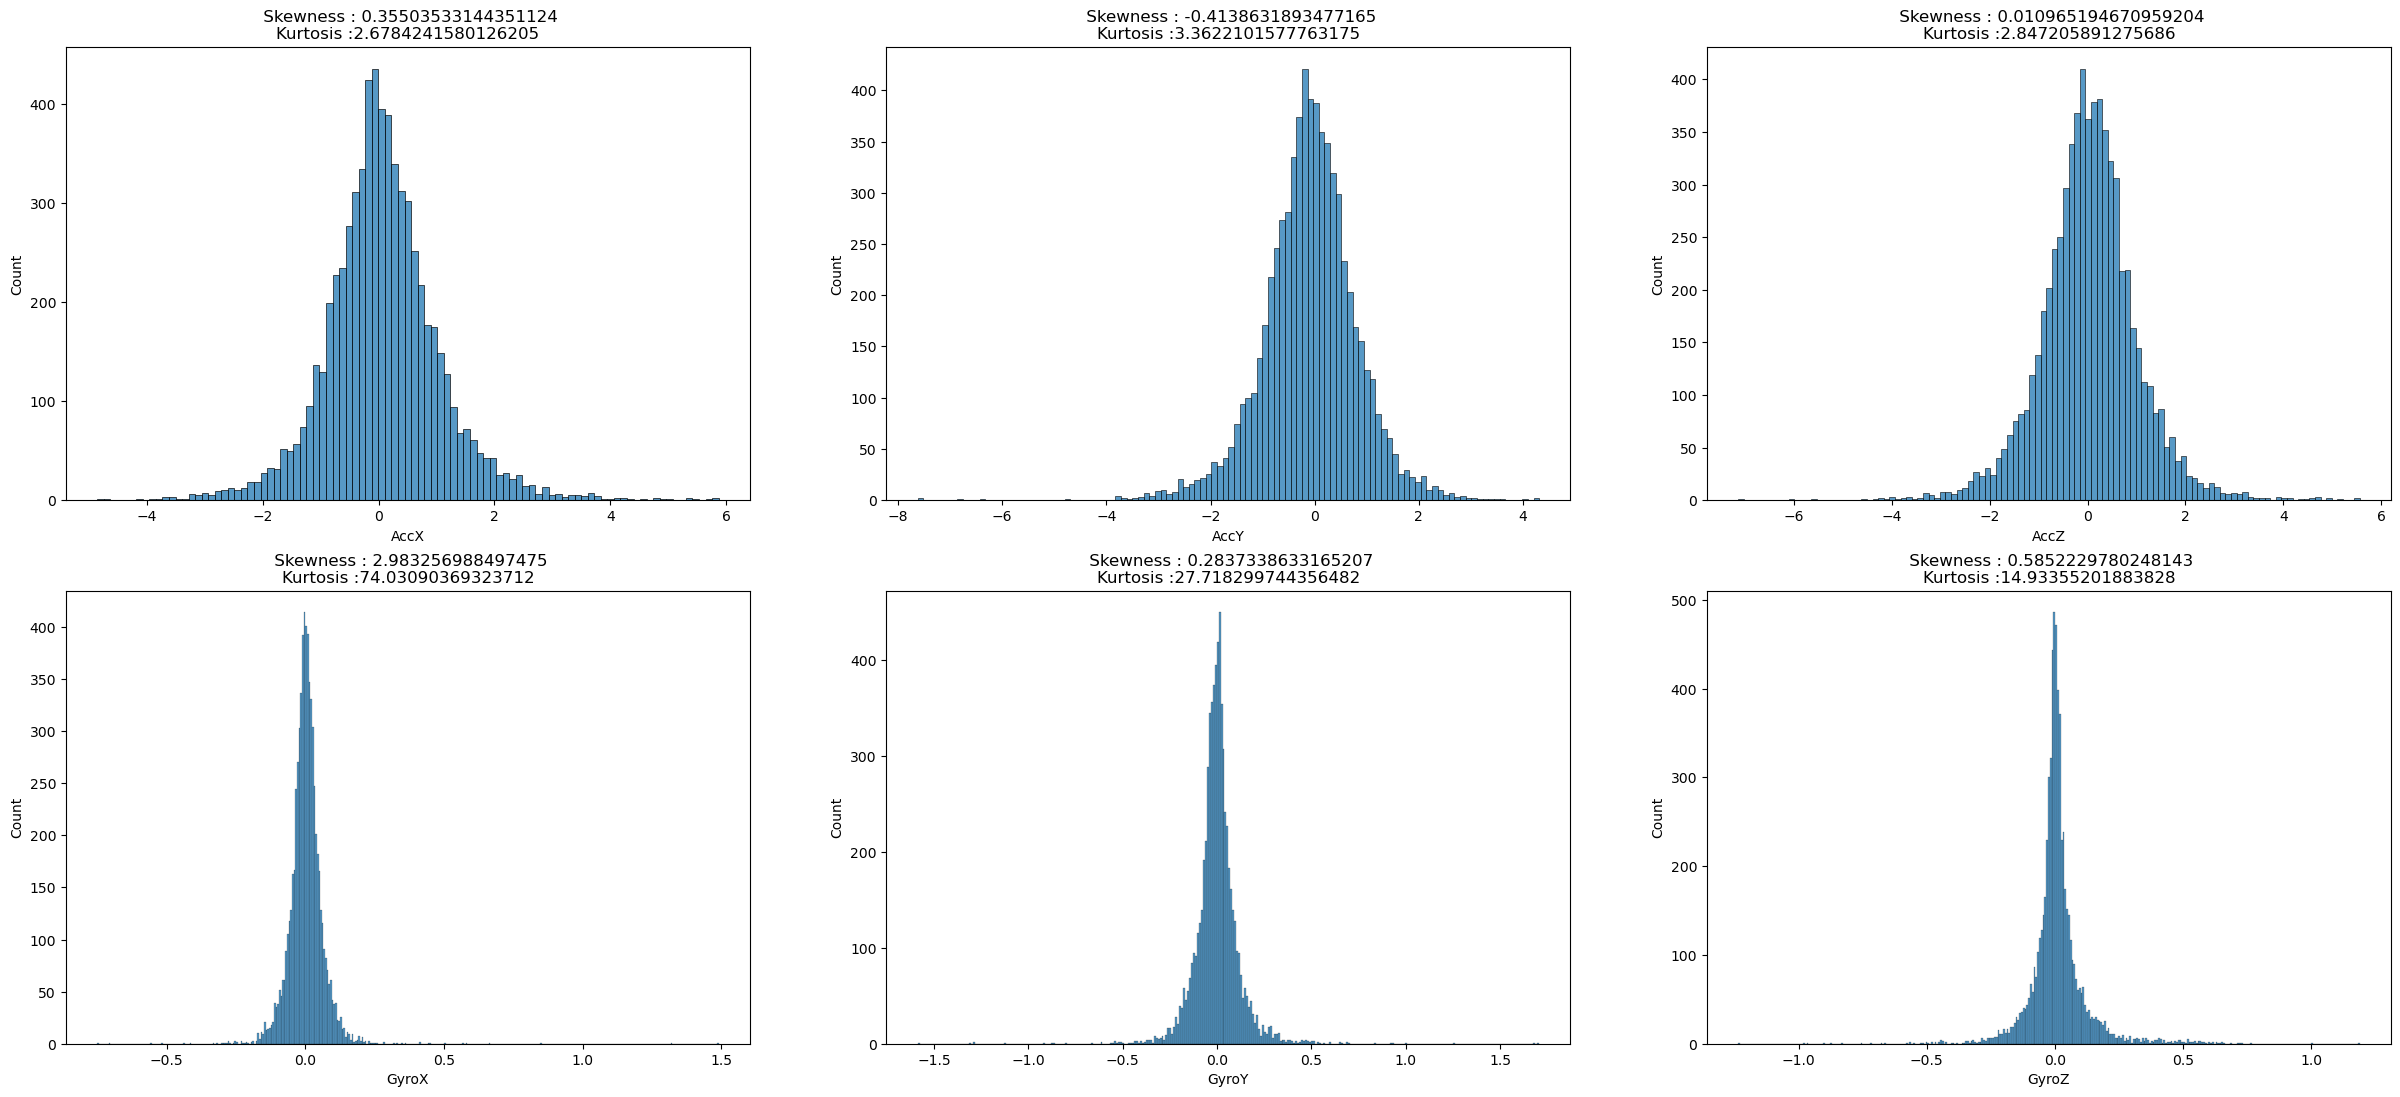

In [8]:
distribution_check(df,['AccX','AccY','AccZ','GyroX','GyroY','GyroZ'	])

In [9]:
def manual_kurtosis(series):
    n = len(series)
    mean = series.mean()
    std_dev = series.std()
    fourth_moment = sum((x - mean) ** 4 for x in series) / n
    kurtosis = fourth_moment / (std_dev ** 4)
    excess_kurtosis = kurtosis - 3  # Subtract 3 to get excess kurtosis
    return excess_kurtosis

# Calculate kurtosis for each numerical feature
kurtosis_values = df[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']].apply(manual_kurtosis)

print("Manual Kurtosis values:")
print(kurtosis_values)


Manual Kurtosis values:
AccX      2.676736
AccY      3.360319
AccZ      2.845468
GyroX    74.008007
GyroY    27.709169
GyroZ    14.928221
dtype: float64


In [10]:
magnitudes = []
for index, row in df.iterrows():
    
    acc_x = row['AccX']
    acc_y = row['AccY']
    acc_z = row['AccZ']
    magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
    magnitudes.append(magnitude)


In [11]:
df_new = df

In [12]:
df_new['Acc_mag'] = magnitudes

In [13]:
kurtosis_value = df_new[['Acc_mag']].apply(manual_kurtosis)
kurtosis_value

Acc_mag    4.731699
dtype: float64

In [14]:
gyro_magnitudes = []
for index, row in df.iterrows():

    gyro_x = row['GyroX']
    gyro_y = row['GyroY']
    gyro_z = row['GyroZ']
    gyro_magnitude = np.sqrt(gyro_x**2 + gyro_y**2 + gyro_z**2)
    gyro_magnitudes.append(gyro_magnitude)

In [15]:
df_new['Gyro_mag'] = gyro_magnitudes

In [16]:
kurtosis_value = df_new[['Gyro_mag']].apply(manual_kurtosis)
kurtosis_value

Gyro_mag    43.540406
dtype: float64

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Preprocessing
X = df_new.drop(columns=["Class", "Timestamp"])  # Features
y = df_new["Class"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7243684992570579


In [18]:
def calculate_jerk(data, feature):
    # Calculate the difference between consecutive acceleration readings
    delta_acc = data[feature].diff()
    delta_time = data['Timestamp'].diff()
    
    # Avoid division by zero by replacing zero differences with a small value (e.g., 1e-6)
    delta_time.replace(0, 1, inplace=True)
    
    # Calculate jerk
    jerk = delta_acc / delta_time
    
    # Fill NaN values resulting from the diff() operation
    jerk = jerk.fillna(0)
    
    return jerk

In [19]:
df_new['JerkX'] = calculate_jerk(df, 'AccX')
df_new['JerkY'] = calculate_jerk(df, 'AccY')
df_new['JerkZ'] = calculate_jerk(df, 'AccZ')

In [20]:
df_new

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp,Acc_mag,Gyro_mag,JerkX,JerkY,JerkZ
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,1,3581629,0.000000,0.210816,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,1,3581630,1.963075,0.147711,-1.624864,-1.082492,-0.204183
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,1,3581630,0.645930,0.094659,1.030204,0.960082,0.424685
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,1,3581631,1.021474,0.093707,1.333138,-0.106046,0.447230
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,1,3581631,0.787030,0.063007,-0.636737,1.006023,-0.734462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6723,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,1,820706,0.981259,1.415663,-0.787153,-0.011592,-1.046988
6724,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,1,820707,1.855745,2.262022,2.228119,0.983045,1.184729
6725,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,1,820707,3.176671,1.017950,-0.234045,-2.065242,-3.353408
6726,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,1,820708,1.450860,0.695271,-0.367904,2.318486,1.367073


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Preprocessing
X = df_new.drop(columns=["Class", "Timestamp"])  # Features
y = df_new["Class"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7325408618127786


In [22]:
kurtosis_value = df_new[['JerkX','JerkY','JerkZ']].apply(manual_kurtosis)
kurtosis_value

JerkX    1.368526
JerkY    1.686104
JerkZ    2.009200
dtype: float64

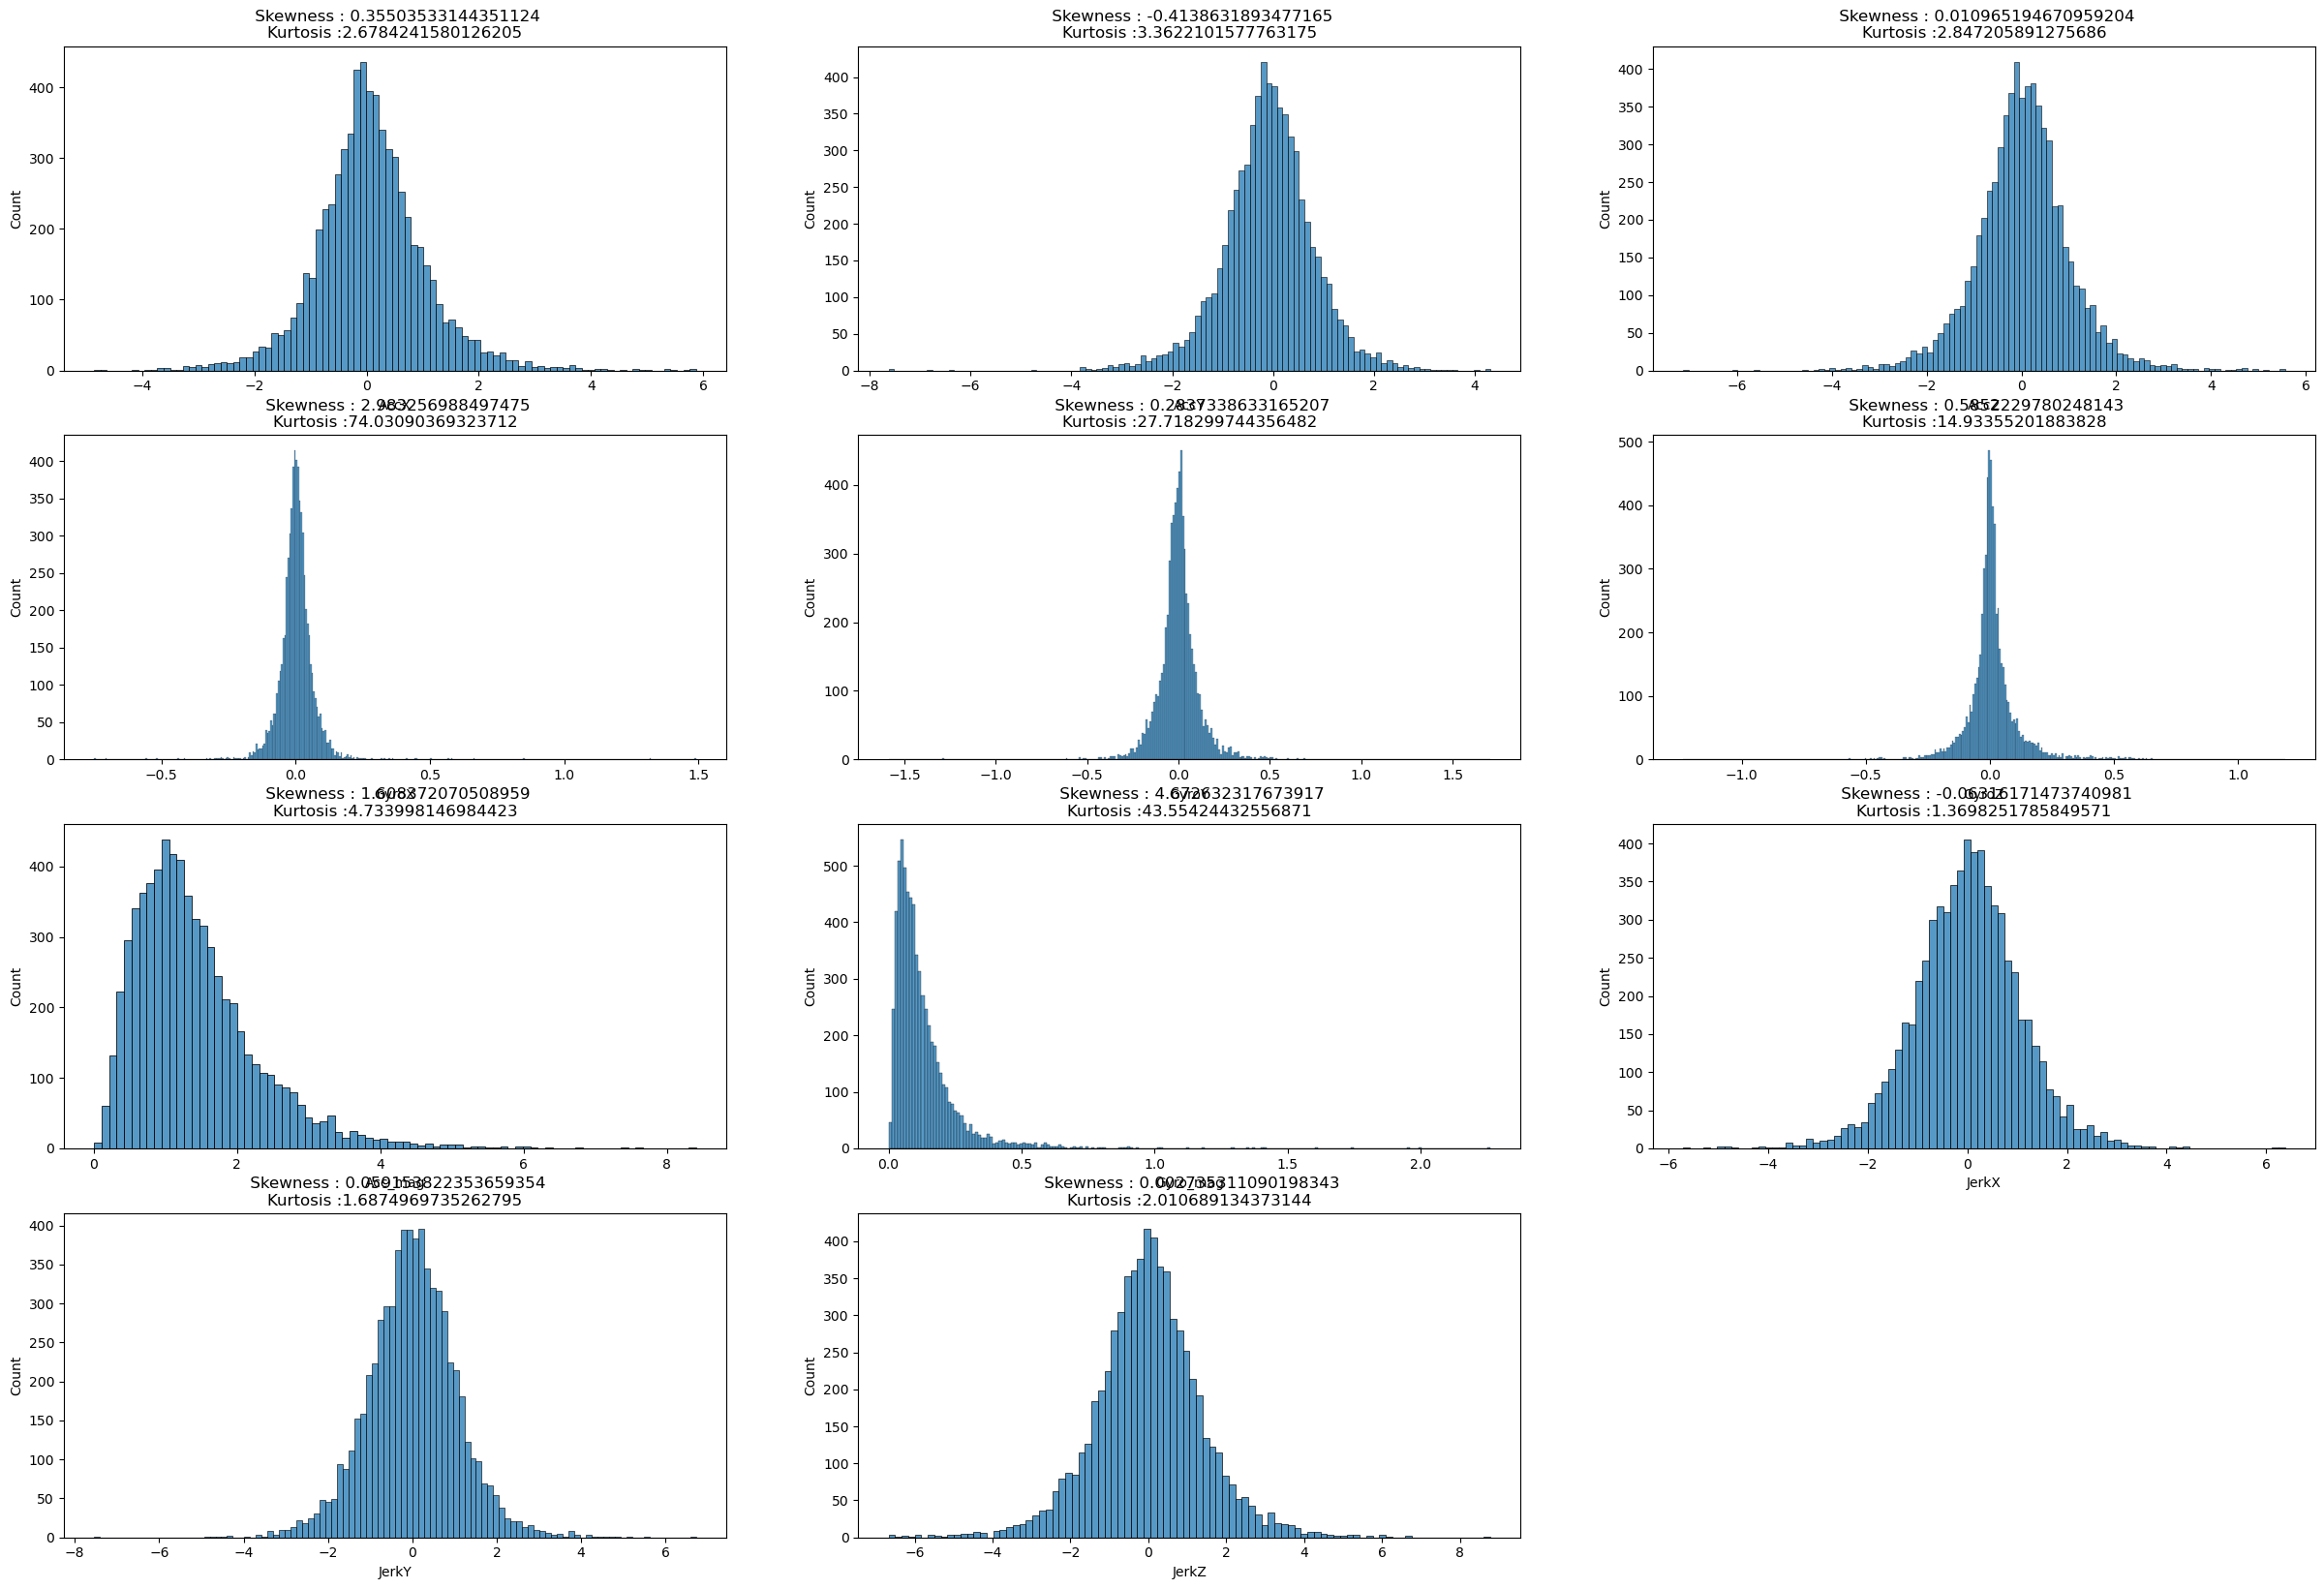

In [23]:
distribution_check(df,['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ',
       'Acc_mag', 'Gyro_mag', 'JerkX', 'JerkY', 'JerkZ'])

In [24]:
df_new.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp,Acc_mag,Gyro_mag,JerkX,JerkY,JerkZ
count,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6.728000e+03,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000
mean,0.070613,-0.100175,0.025112,0.002326,-0.000024,0.009564,0.713585,2.316251e+06,1.418613,0.128734,-0.000175,0.000808,-0.000660
std,0.978118,0.904262,0.990935,0.066789,0.123828,0.114710,0.452119,1.376747e+06,0.871349,0.128353,1.069322,1.067728,1.392958
min,-4.854163,-7.621754,-7.143998,-0.751822,-1.587028,-1.236468,0.000000,8.189220e+05,0.000000,0.000000,-5.706999,-7.545510,-6.669646
25%,-0.478331,-0.605450,-0.519489,-0.026267,-0.050702,-0.028253,0.000000,8.199088e+05,0.812711,0.054025,-0.654583,-0.653136,-0.793452
50%,0.029885,-0.087355,0.028696,0.001374,-0.001222,0.002367,1.000000,3.581780e+06,1.238742,0.094571,0.016769,-0.000117,-0.002021
75%,0.587433,0.423664,0.563334,0.030085,0.047877,0.038332,1.000000,3.582777e+06,1.815966,0.160024,0.655611,0.653326,0.796354
max,5.864980,4.308813,5.564037,1.490511,1.707598,1.190500,1.000000,3.583791e+06,8.405834,2.262022,6.379929,6.718676,8.780427


In [25]:
df.columns

Index(['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Class', 'Timestamp',
       'Acc_mag', 'Gyro_mag', 'JerkX', 'JerkY', 'JerkZ'],
      dtype='object')

In [26]:
df

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp,Acc_mag,Gyro_mag,JerkX,JerkY,JerkZ
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,1,3581629,0.000000,0.210816,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,1,3581630,1.963075,0.147711,-1.624864,-1.082492,-0.204183
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,1,3581630,0.645930,0.094659,1.030204,0.960082,0.424685
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,1,3581631,1.021474,0.093707,1.333138,-0.106046,0.447230
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,1,3581631,0.787030,0.063007,-0.636737,1.006023,-0.734462
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6723,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,1,820706,0.981259,1.415663,-0.787153,-0.011592,-1.046988
6724,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,1,820707,1.855745,2.262022,2.228119,0.983045,1.184729
6725,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,1,820707,3.176671,1.017950,-0.234045,-2.065242,-3.353408
6726,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,1,820708,1.450860,0.695271,-0.367904,2.318486,1.367073


In [27]:
df.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp,Acc_mag,Gyro_mag,JerkX,JerkY,JerkZ
count,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000,6.728000e+03,6728.000000,6728.000000,6728.000000,6728.000000,6728.000000
mean,0.070613,-0.100175,0.025112,0.002326,-0.000024,0.009564,0.713585,2.316251e+06,1.418613,0.128734,-0.000175,0.000808,-0.000660
std,0.978118,0.904262,0.990935,0.066789,0.123828,0.114710,0.452119,1.376747e+06,0.871349,0.128353,1.069322,1.067728,1.392958
min,-4.854163,-7.621754,-7.143998,-0.751822,-1.587028,-1.236468,0.000000,8.189220e+05,0.000000,0.000000,-5.706999,-7.545510,-6.669646
25%,-0.478331,-0.605450,-0.519489,-0.026267,-0.050702,-0.028253,0.000000,8.199088e+05,0.812711,0.054025,-0.654583,-0.653136,-0.793452
50%,0.029885,-0.087355,0.028696,0.001374,-0.001222,0.002367,1.000000,3.581780e+06,1.238742,0.094571,0.016769,-0.000117,-0.002021
75%,0.587433,0.423664,0.563334,0.030085,0.047877,0.038332,1.000000,3.582777e+06,1.815966,0.160024,0.655611,0.653326,0.796354
max,5.864980,4.308813,5.564037,1.490511,1.707598,1.190500,1.000000,3.583791e+06,8.405834,2.262022,6.379929,6.718676,8.780427


In [28]:
def count_repeated_values(df):
    repeated_counts = {}
    for column in df.columns:
        value_counts = df[column].value_counts()
        repeated = value_counts[value_counts > 1]
        repeated_counts[column] = len(repeated)
    return repeated_counts

repeated_counts = count_repeated_values(df)
print(repeated_counts)

{'AccX': 1, 'AccY': 0, 'AccZ': 6, 'GyroX': 726, 'GyroY': 1025, 'GyroZ': 894, 'Class': 2, 'Timestamp': 3093, 'Acc_mag': 0, 'Gyro_mag': 2, 'JerkX': 0, 'JerkY': 0, 'JerkZ': 1}


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Preprocessing
X = df_new.drop(columns=["Class", "Timestamp"])  # Features
y = df_new["Class"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7325408618127786


In [30]:
data = df_new.drop(['Timestamp','Class'],axis=1)

In [31]:
data

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Acc_mag,Gyro_mag,JerkX,JerkY,JerkZ
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,0.000000,0.210816,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,1.963075,0.147711,-1.624864,-1.082492,-0.204183
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,0.645930,0.094659,1.030204,0.960082,0.424685
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,1.021474,0.093707,1.333138,-0.106046,0.447230
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,0.787030,0.063007,-0.636737,1.006023,-0.734462
...,...,...,...,...,...,...,...,...,...,...,...
6723,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,0.981259,1.415663,-0.787153,-0.011592,-1.046988
6724,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,1.855745,2.262022,2.228119,0.983045,1.184729
6725,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,3.176671,1.017950,-0.234045,-2.065242,-3.353408
6726,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,1.450860,0.695271,-0.367904,2.318486,1.367073


In [32]:
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import skew, kurtosis

quantile_transformer = QuantileTransformer(output_distribution='normal')

df_quantile_transformed = quantile_transformer.fit_transform(data)

skewness = skew(df_quantile_transformed)
kurt = kurtosis(df_quantile_transformed)

print("Skewness:", skewness)
print("Kurtosis:", kurt)


Skewness: [ 0.00481742 -0.00333755  0.00316778 -0.00144181  0.00293791 -0.00063034
  0.00760028  0.0016014   0.00031563  0.00014027 -0.01193274]
Kurtosis: [0.14167571 0.16504369 0.12873368 0.12568899 0.13602151 0.1131466
 0.14154216 0.1222618  0.12818836 0.10447023 0.15058257]


Skewness:
 AccX        0.004817
AccY       -0.003338
AccZ        0.003168
GyroX      -0.001442
GyroY       0.002938
GyroZ      -0.000630
Acc_mag     0.007600
Gyro_mag    0.001601
JerkX       0.000316
JerkY       0.000140
JerkZ      -0.011933
dtype: float64
Kurtosis:
 AccX        0.141676
AccY        0.165044
AccZ        0.128734
GyroX       0.125689
GyroY       0.136022
GyroZ       0.113147
Acc_mag     0.141542
Gyro_mag    0.122262
JerkX       0.128188
JerkY       0.104470
JerkZ       0.150583
dtype: float64


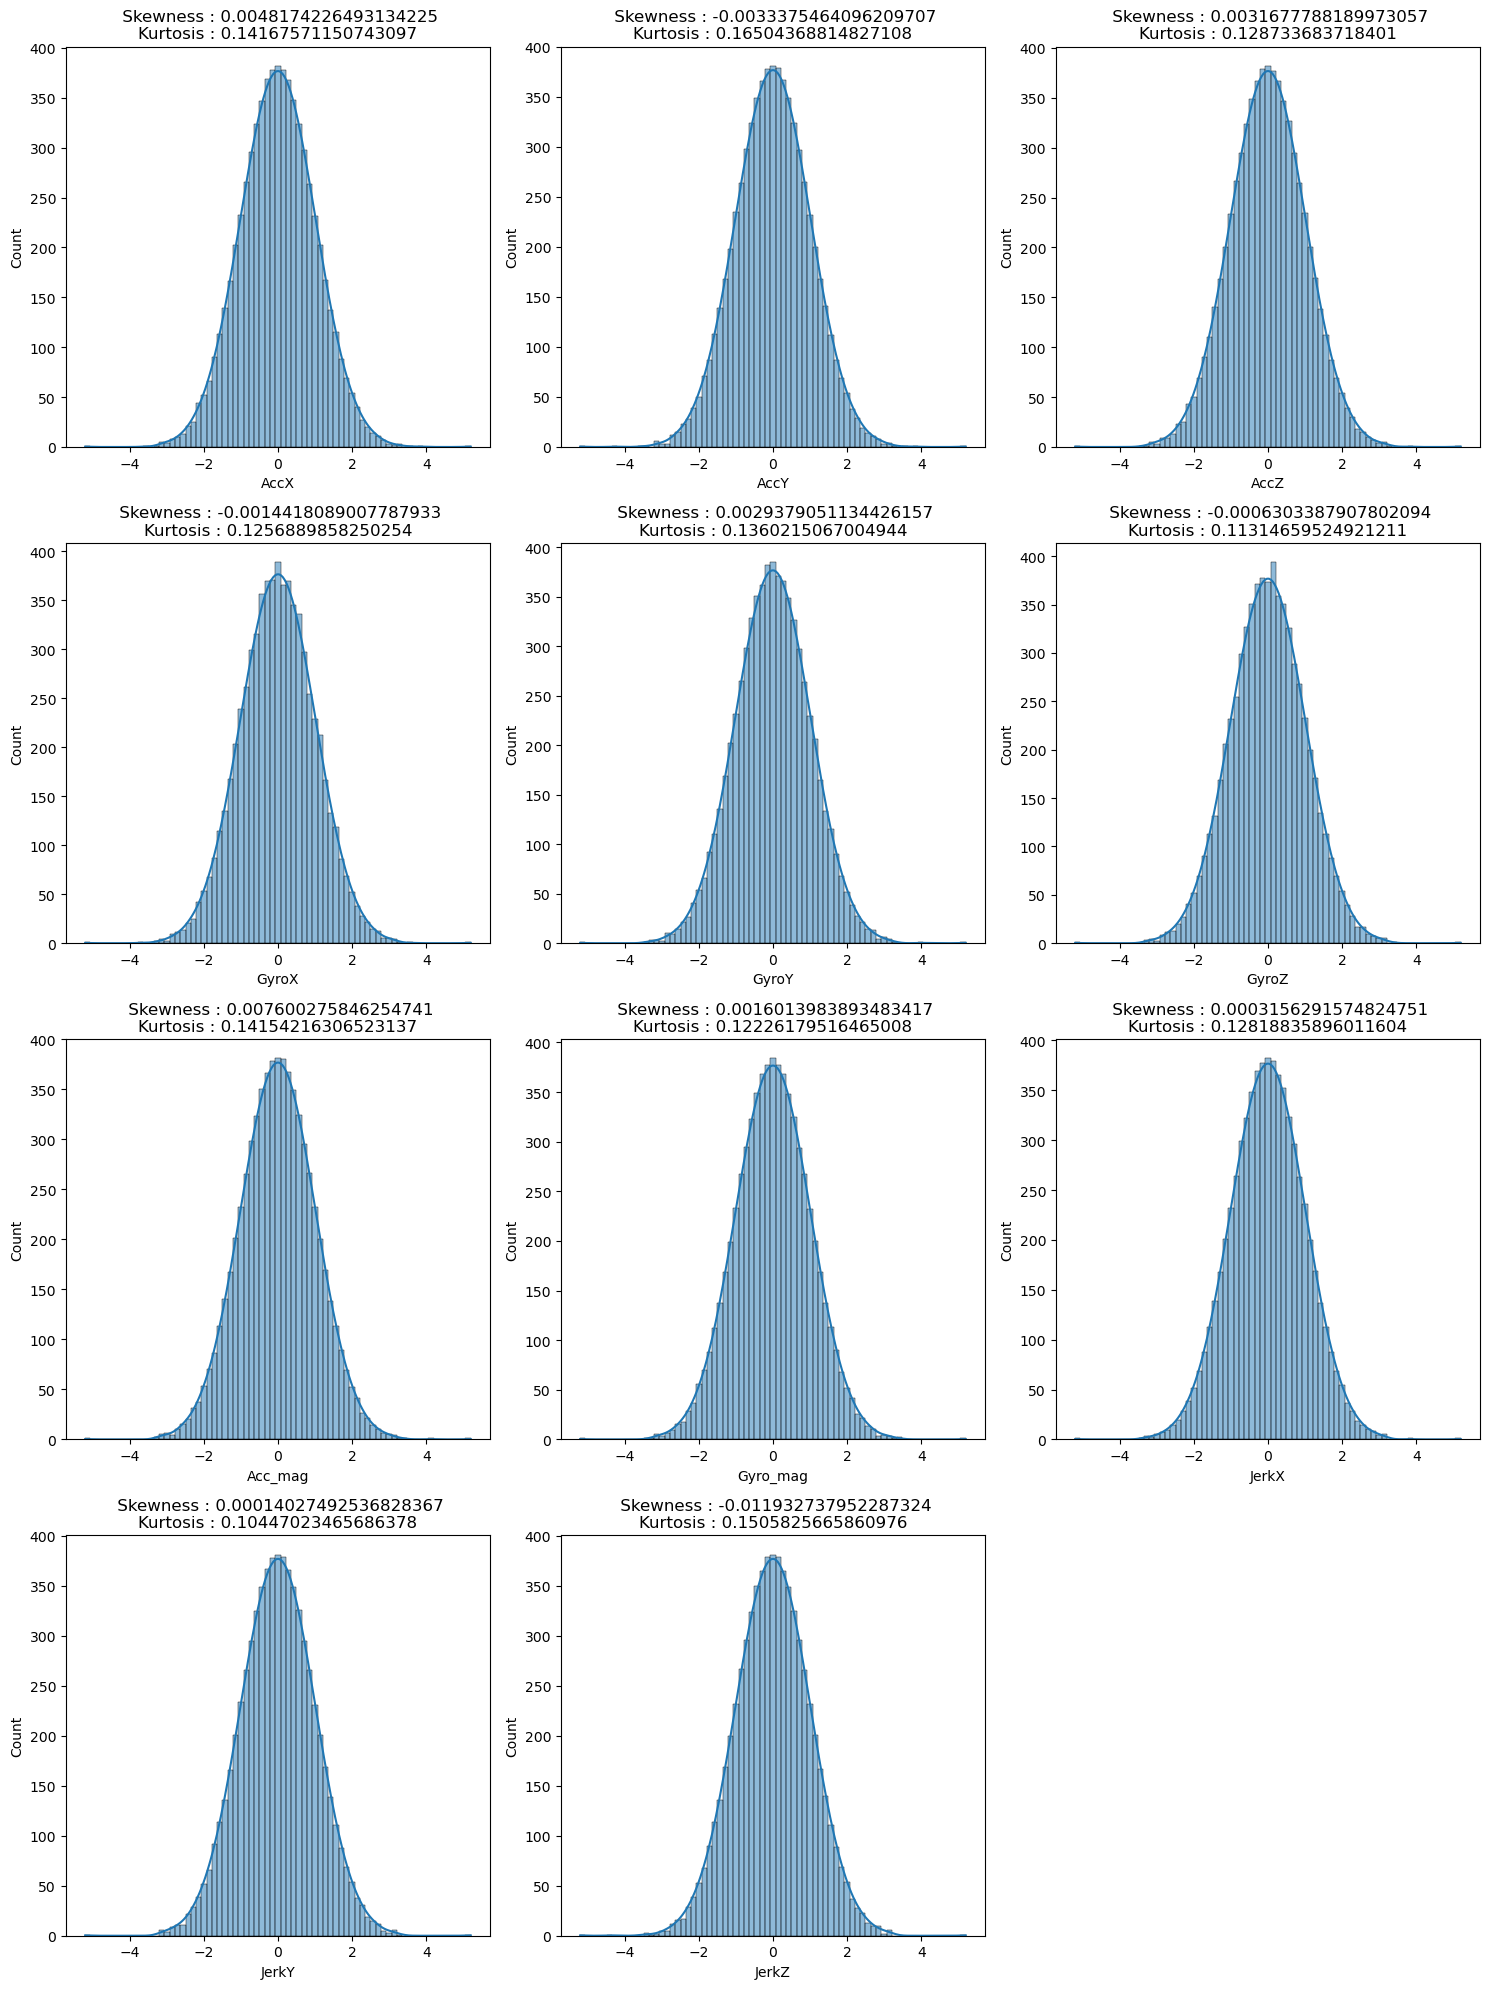

In [33]:
# Convert the transformed data back to a DataFrame
df_quantile_transformed = pd.DataFrame(df_quantile_transformed, columns=data.select_dtypes(include=[float, int]).columns)

# Define the function to check distribution
def distribution_check(df, Cols):
    fig = plt.figure(figsize=(15, 5 * ((len(Cols) + 2) // 3)))  # Adjust the figure size based on the number of columns
    for idx, col in enumerate(Cols, 1):
        sk = f" Skewness : {skew(df[col])}\nKurtosis : {kurtosis(df[col])}"
        plt.subplot((len(Cols) + 2) // 3, 3, idx)  # Correct subplot indexing
        sns.histplot(df[col], kde=True).set_title(sk)  # Add KDE for better visualization
    plt.tight_layout()
    plt.show()

# Calculate and print skewness and kurtosis for each column
skewness = df_quantile_transformed.apply(skew)
kurt = df_quantile_transformed.apply(kurtosis)

print("Skewness:\n", skewness)
print("Kurtosis:\n", kurt)

# Call the distribution_check function with the transformed DataFrame
distribution_check(df_quantile_transformed, df_quantile_transformed.columns.tolist())

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Preprocessing
scaler  = StandardScaler()
X = data # Features
y = df_new["Class"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7325408618127786


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "k-NN": KNeighborsClassifier()
}

# Evaluate each model using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: Mean CV Accuracy = {cv_scores.mean():.4f}")

# Train and evaluate the best model on the test set
best_model = RandomForestClassifier()  # Replace with the best-performing model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of the best model: {accuracy:.4f}")


Logistic Regression: Mean CV Accuracy = 0.7336
SVM: Mean CV Accuracy = 0.7467
Random Forest: Mean CV Accuracy = 0.7389
Gradient Boosting: Mean CV Accuracy = 0.7408
k-NN: Mean CV Accuracy = 0.7088
Test Accuracy of the best model: 0.7355


In [38]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),  # Input layer with 6 nodes
    Dense(64, activation='relu'),                   # Hidden layer with 64 nodes
    Dense(1, activation='sigmoid')                  # Output layer with 1 node
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Assuming binary classification, change for multiclass
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=100, validation_split=0.2)

Epoch 1/30
44/44 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.6725 - val_loss: 0.6120 - val_accuracy: 0.7363
Epoch 2/30
44/44 [==============================] - 0s 1ms/step - loss: 0.6081 - accuracy: 0.7196 - val_loss: 0.5837 - val_accuracy: 0.7484
Epoch 3/30
44/44 [==============================] - 0s 993us/step - loss: 0.5838 - accuracy: 0.7254 - val_loss: 0.5612 - val_accuracy: 0.7447
Epoch 4/30
44/44 [==============================] - 0s 986us/step - loss: 0.5642 - accuracy: 0.7361 - val_loss: 0.5468 - val_accuracy: 0.7549
Epoch 5/30
44/44 [==============================] - 0s 972us/step - loss: 0.5490 - accuracy: 0.7431 - val_loss: 0.5335 - val_accuracy: 0.7558
Epoch 6/30
44/44 [==============================] - 0s 1ms/step - loss: 0.5387 - accuracy: 0.7491 - val_loss: 0.5286 - val_accuracy: 0.7614
Epoch 7/30
44/44 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 0.7512 - val_loss: 0.5291 - val_accuracy: 0.7614
Epoch 8/30
44/

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

fcnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(11,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

fcnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
fcnn_model.summary()
fcnn_model.fit(X_train, y_train, epochs=30, batch_size=100, validation_split=0.2)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               1536      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
44/44 [=